# Survival Prediction

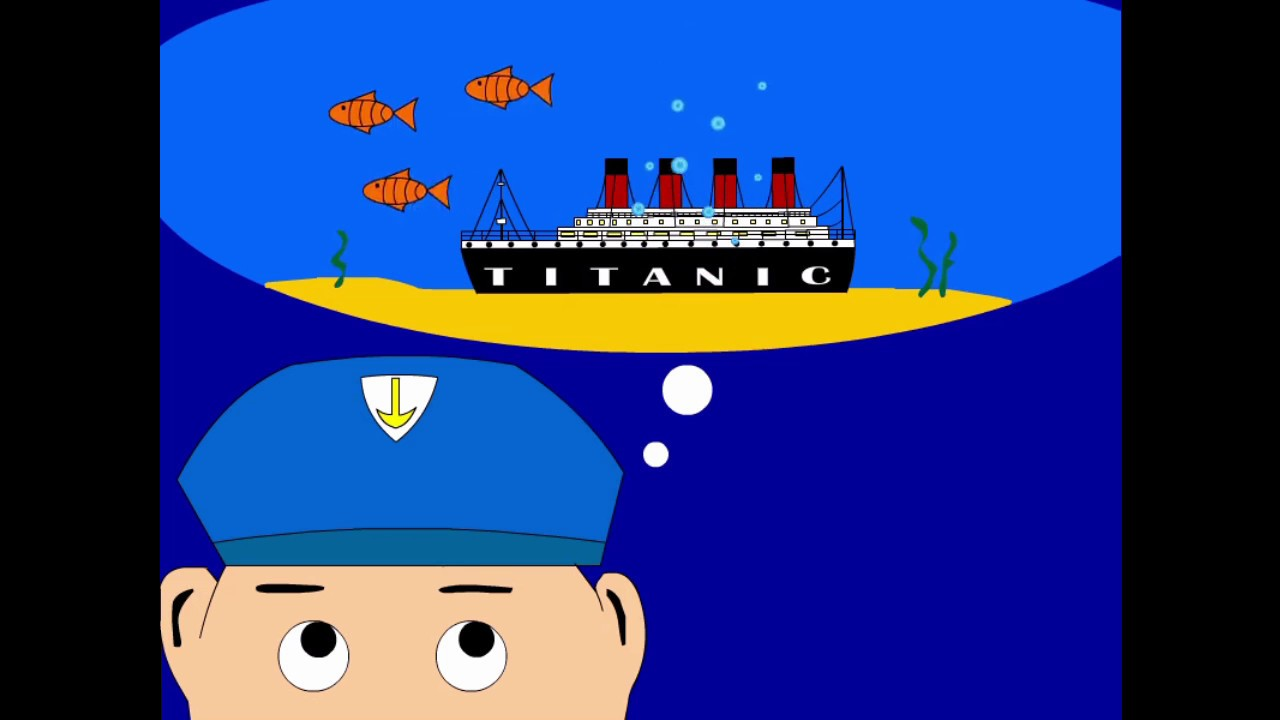

## Predict the likelihood of a titanic passenger to survive or not ?

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings

In [2]:
# Set Display parameters
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
# Set Working directory
os.chdir(r'C:\Users\SHALESH\Desktop\UC Module - 3 Week 3\Assignment - 3')

In [4]:
# Get List of files in working directory 
os.listdir()

['Assignment 3.pdf',
 'Data Dictionary - Titanic data.txt',
 'titanic_dataset.csv',
 'x.xlsx']

## Read Datasets 

In [5]:
data=pd.read_csv("titanic_dataset.csv",na_values=[""," ","NA","N/A"])

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary & insights of some variables

 Variable Definition Key:

1. Survival Survival 0 = No, 1 = Yes
2. pclass         Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3. sex         Sex 
4. Age         Age in years 
5. sibsp         # of siblings / spouses aboard the Titanic 
6. parch         # of parents / children aboard the Titanic 
7. ticket        Ticket number 
8. fare        Passenger fare 
9. cabin        Cabin number 
10. embarked       Port of Embarkation  C = Cherbourg, Q = Queenstown, S = Southampton
    

 =====================Variable Notes==================

#### pclass: A proxy for socio-economic status (SES)
1. 1st = Upper
2. 2nd = Middle
3. 3rd = Lower

#### Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

#### Sibsp: The dataset defines family relations in this way...
1. Sibling = brother, sister, stepbrother, stepsister
2. Spouse = husband, wife (mistresses and fiancés were ignored)

#### Parch: The dataset defines family relations in this way...
1. Parent = mother, father
2. Child = daughter, son, stepdaughter, stepson
3. Some children travelled only with a nanny, therefore parch=0 for them.

In [7]:
data.shape

(891, 12)

In [8]:
# lower the case of column names 
data.columns = map(str.lower, data.columns)  
print(list(data.columns))

['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


In [9]:
list(data.columns)

['passengerid',
 'survived',
 'pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Quick descriptive statistics of dataset 
x=data.describe(include='all')
x
# x.to_csv("desc_stats_data.csv")
x.to_excel('x.xlsx')

In [12]:
x.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.0,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hewlett, Mrs. (Mary D Kingcome)",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.0,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN


### Insights from descriptive statistics:-

 1. 38.8% of the survival column has people who have survived and remaining died. 
 2. 50% of the people have Pclass as type 3 and rest 25% with class type 1 & 2.
 3. There are all different names of people who boarded the ship.
 4. There were (75%) 577 males who boarde the ship.
 5. There is (19.8)% 177 people whose data  is missing for age.
 6. 50% of the people travelled without siblings.
 7. 75% of the data is null in the parched column
 8. The mean fare collected by the team was 32 units but the max value is 512. which shows that the data has outliers.
 9. The Cabin column has 77% of the data as missing and so it can be ignored.
 10. The embarked column shows the poeple from 3 different cities with only 2 columns as missing, so those 2 rows can be ignored      or deleted.  
 11. There are a total of 891 passengers in our training set.
 12. The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to          survival, so we should probably attempt to fill these gaps.
 13. The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard        to fill in the missing values. We'll probably drop these values from our dataset.
 14. The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

In [13]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cabin,687,0.771044
age,177,0.198653
embarked,2,0.002245
fare,0,0.000000
ticket,0,0.000000
parch,0,0.000000
sibsp,0,0.000000
sex,0,0.000000
name,0,0.000000
pclass,0,0.000000


In [14]:
# Make a copy of original data
data2=data.copy()
data2.shape

(891, 12)

In [15]:
data2.dtypes

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

In [16]:
# convert numeric to character type for passengerid & pclass variables 
data2['passengerid']=data2['passengerid'].astype(str)
data2['pclass']=data2['pclass'].astype(str)                                  

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    object 
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    object 
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


## EDA 

### Univariate analysis

In [18]:
data2.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked'], dtype='object')

In [19]:
# Seperate columns into numeric and categorical columns
types = np.array([dt for dt in data2.dtypes])

all_columns = data2.columns.values

is_num = types != 'object'
num_cols = all_columns[is_num]
cat_cols = all_columns[~is_num]

data2_num = (data2[num_cols]) 
data2_cat = (data2[cat_cols])

print("Numeric: ",data2_num.columns)
print('')
print("Character: ",data2_cat.columns)

Numeric:  Index(['survived', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

Character:  Index(['passengerid', 'pclass', 'name', 'sex', 'ticket', 'cabin', 'embarked'], dtype='object')


In [20]:
data2_num.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [21]:
data2_cat.columns

Index(['passengerid', 'pclass', 'name', 'sex', 'ticket', 'cabin', 'embarked'], dtype='object')

In [22]:
# Created a function to produce descriptive statistics, frequency distribution and count plot all at the same time 
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]  
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())
        print(series.value_counts(dropna=False, normalize=True).mul(100).round(2).astype(str) + '%')
        sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, order = data[y].value_counts().index)
        plt.show()

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


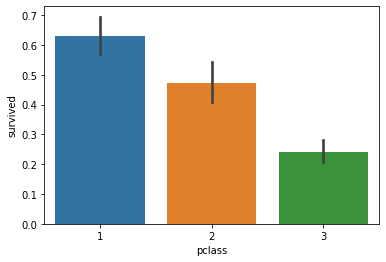

In [23]:
# Distribution of percentage of people by Pclass that survived
sns.barplot(x="pclass", y="survived", data=data2)
print("Percentage of Pclass = 1 who survived:", data2["survived"][data2["pclass"] == '1'].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", data2["survived"][data2["pclass"] == '2'].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", data2["survived"][data2["pclass"] == '3'].value_counts(normalize = True)[1]*100)

###### <font color=red> <b><u><i> 
  <b><i><font color=red>The class 1 people survived the most with 62.96% and class 3 with least survival rate of 24.2% </font> </b> </i>

count      891
unique       2
top       male
freq       577
Name: sex, dtype: object
mode:  0    male
dtype: object
male      577
female    314
Name: sex, dtype: int64
male      64.76%
female    35.24%
Name: sex, dtype: object


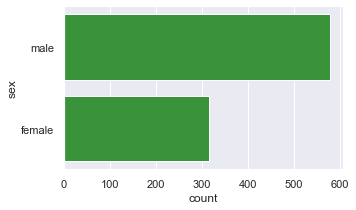

None


In [24]:
# % of people who present on the ship
sns.set(rc={'figure.figsize':(5,3)})
print(categorical_summarized(data2, y = 'sex', palette=['tab:green']))

###### <font color=red> <b><u><i> 
  <b><i><font color=red>There were 64.76% of males and 35.24% of females present on the ship. </font> </b> </i>

count     889
unique      3
top         S
freq      644
Name: embarked, dtype: object
mode:  0    S
dtype: object
S    644
C    168
Q     77
Name: embarked, dtype: int64
S      72.28%
C      18.86%
Q       8.64%
NaN     0.22%
Name: embarked, dtype: object


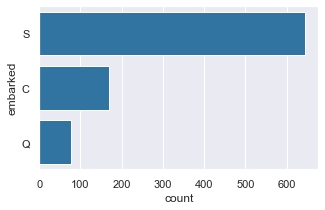

None


In [25]:
# embarked
sns.set(rc={'figure.figsize':(5,3)})
print(categorical_summarized(data2, y = 'embarked', palette=['tab:blue']))

###### <font color=red> <b><u><i> 
  <b><i><font color=red>72.28% of people who boarded the ship came from Southampton, with 18.86% from Cherbourg and 8% from Queenstown.  </font> </b> </i>

### Numeric variable analysis 

In [26]:
# histograms
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data2[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

g:\aws\envs\sallu\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
g:\aws\envs\sallu\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


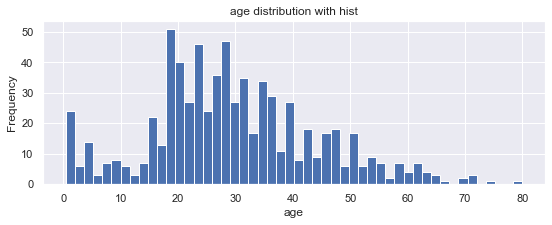

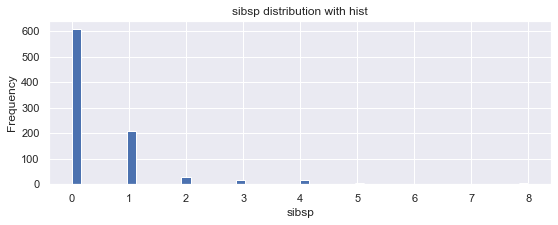

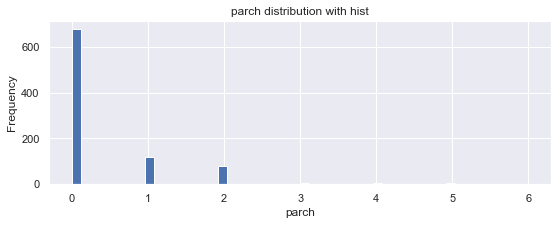

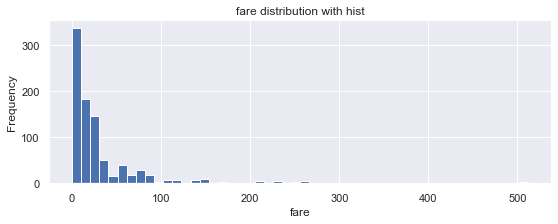

In [27]:
numericVar = ['age', 'sibsp', 'parch', 'fare']
for n in numericVar:
    plot_hist(n)

###### <font color=red> <b><u><i> Insights from the graph </b> </i>
  - <b><i><font color=red>Majority of people who boarded the ship belonged to 20-30 year age group.   </font> </b> </i>
  - <b><i><font color=red>67% of people came without siblings/spouses.   </font> </b> </i>  
  - <b><i><font color=red>More than 70% of people came without parent/children.   </font> </b> </i>      

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64
mode:  0    0
dtype: int64
0    549
1    342
Name: survived, dtype: int64
0    61.62%
1    38.38%
Name: survived, dtype: object


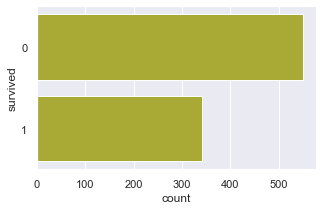

None


In [28]:
# Dependent variable (Survived flag)
sns.set(rc={'figure.figsize':(5,3)})
print(categorical_summarized(data2, y = 'survived', palette=['tab:olive']))

# No of events= mean x total records

###### <font color=red> <b><u><i>
  <b><i><font color=red>62% of people died and 38% people survived in the tragedy.  </font> </b> </i>

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: sibsp, dtype: float64
mode:  0    0
dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    68.24%
1    23.46%
2     3.14%
4     2.02%
3      1.8%
8     0.79%
5     0.56%
Name: sibsp, dtype: object


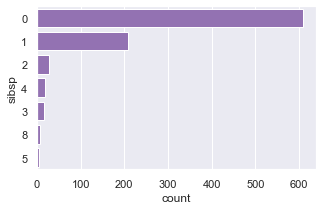

None


In [29]:
# sibsp 
sns.set(rc={'figure.figsize':(5,3)})
print(categorical_summarized(data2, y = 'sibsp', palette=['tab:purple']))

###### <font color=red> <b><u><i>
  <b><i><font color=red>68% people attended the cruise without siblings and 23% came with 1 sibling. </font> </b> </i>

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: parch, dtype: float64
mode:  0    0
dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
0    76.09%
1    13.24%
2     8.98%
5     0.56%
3     0.56%
4     0.45%
6     0.11%
Name: parch, dtype: object


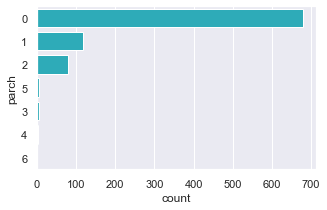

None


In [30]:
# parch 
sns.set(rc={'figure.figsize':(5,3)})
print(categorical_summarized(data2, y = 'parch', palette=['tab:cyan']))

###### <font color=red> <b><u><i>
  <b><i><font color=red>76% preferred coming to the cruise without their parents or children. </font> </b> </i>

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64
mode:  0    24.0
dtype: float64
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
44.00     9
48.00     9
54.00     8
9.00      8
1.00      7
51.00     7
52.00     6
14.00     6
3.00      6
49.00     6
41.00     6
37.00     6
15.00     5
43.00     5
58.00     5
11.00     4
62.00     4
60.00     4
8.00      4
56.00     4
5.00      4
46.00     3
65.00     3
7.00      3
6.00      3
61.00     3
55.00     2
28.50     2
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.

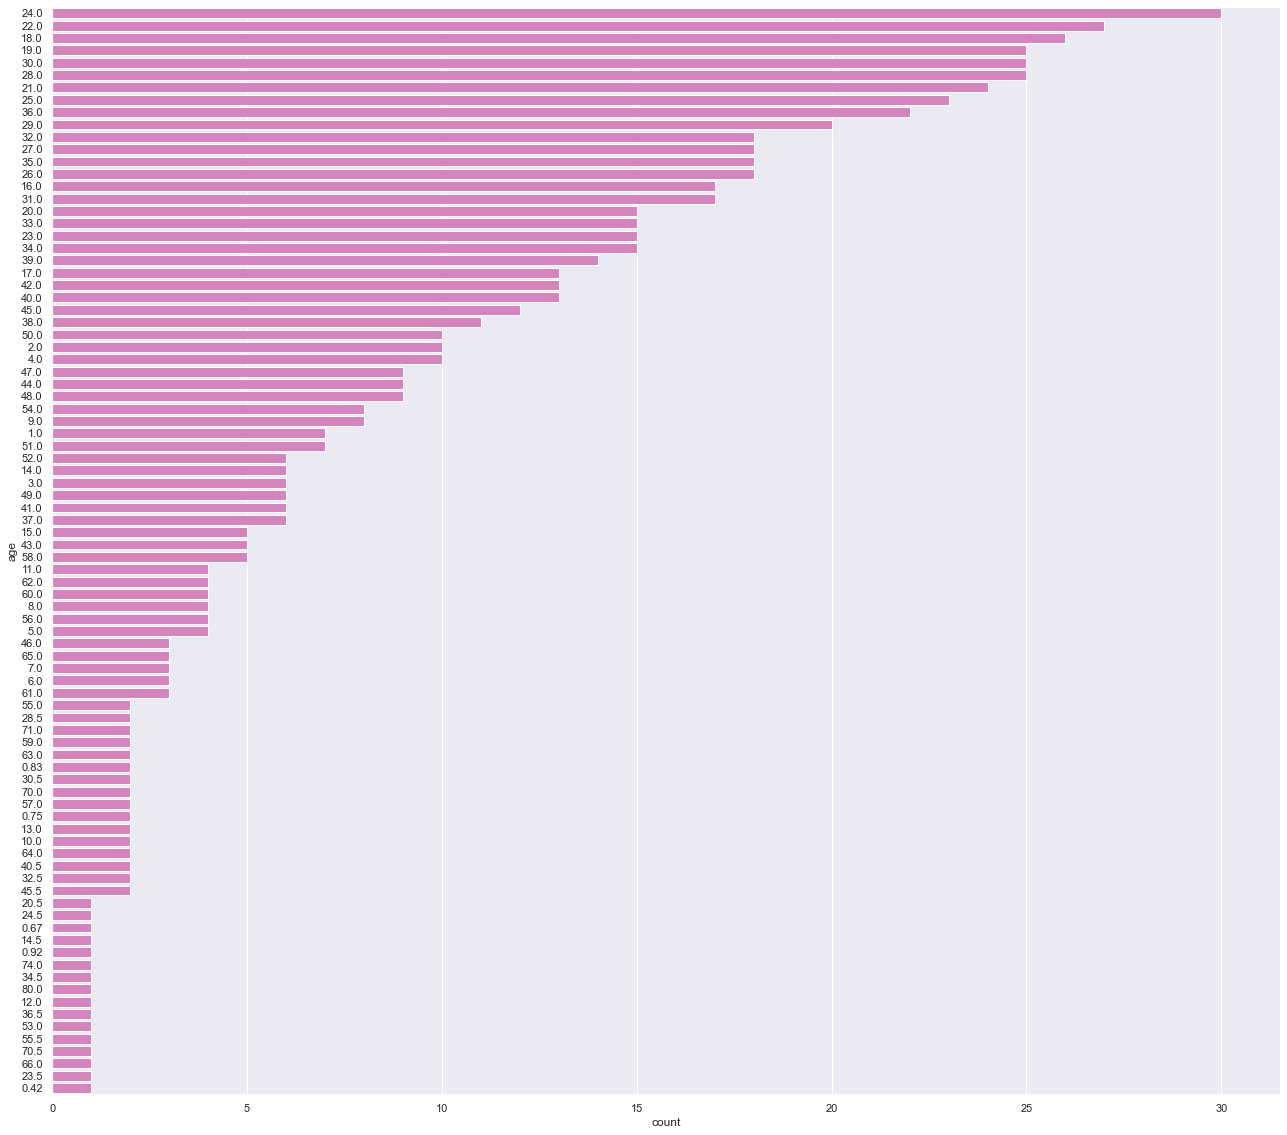

None


In [31]:
# age 
sns.set(rc={'figure.figsize':(22,20)})
print(categorical_summarized(data2, y = 'age', palette=['tab:pink']))

###### <font color=red> <b><u><i>
  <b><i><font color=red>The max people who attended the cruise belonged to 24 years of age with 3.37% </font> </b> </i>

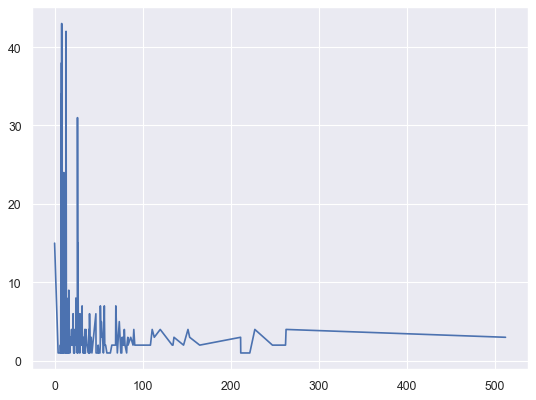

In [32]:
# line plot for fare variable 
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

data2['fare'].value_counts().sort_index().plot.line()

### Bivariate analysis 

In [33]:
data2.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked'], dtype='object')

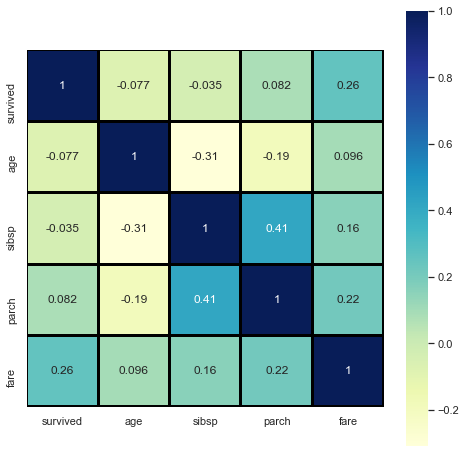

In [34]:
#correlation matrix
fig, axs = plt.subplots(nrows=1, figsize=(8,8))
sns.heatmap(data2.corr(), annot=True, square=True, cmap='YlGnBu', linewidths=2, linecolor='black', annot_kws={'size':12})

In [35]:
data2.corr()["survived"]

survived    1.000000
age        -0.077221
sibsp      -0.035322
parch       0.081629
fare        0.257307
Name: survived, dtype: float64

#### 1. age, sibsp are negatively correlated with survived
#### 2. parch, fare are positively correlated with survived 

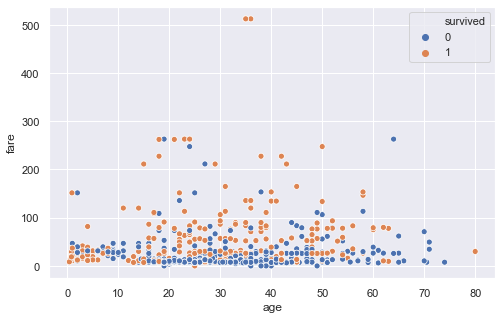

In [36]:
# Scatter plot (fare vs age)

sns.set(rc={'figure.figsize':(8,5)})
ax = sns.scatterplot(x="age", y="fare",hue='survived', data=data2)

#### Higher survival is observed for higher fare and lower age groups 

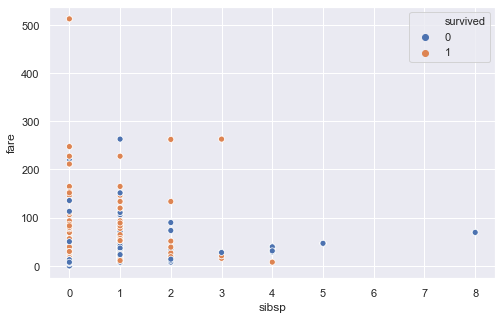

In [37]:
# Scatter plot (sibsp vs fare) ---using seaborn
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.scatterplot(x="sibsp", y="fare",hue='survived', data=data2)

g:\aws\envs\sallu\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
g:\aws\envs\sallu\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


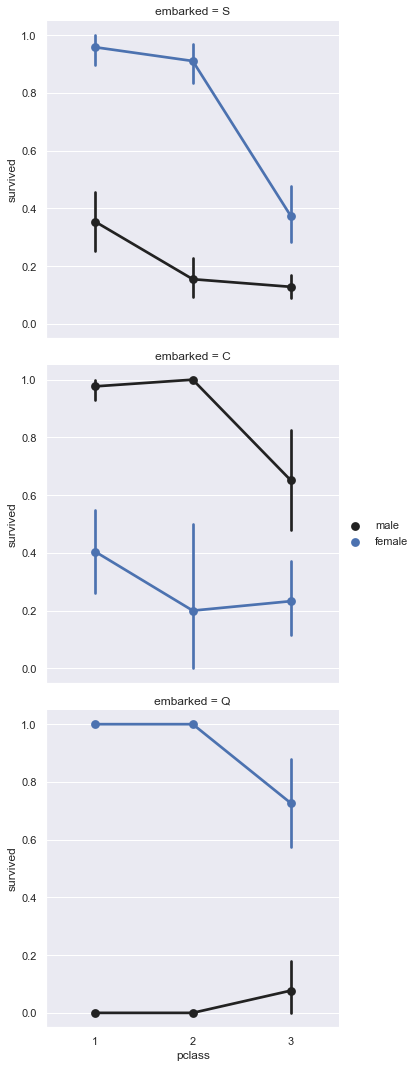

In [38]:
g = sns.FacetGrid(data2, row = "embarked", height = 5)
g.map(sns.pointplot, "pclass","survived","sex")
g.add_legend()
plt.show()

In [39]:
### Passenger class vs Survived
import scipy.stats as corr
orange = sns.light_palette("orange", as_cmap=True) # column percentages 
cont1=pd.crosstab(data2['pclass'],data2['survived'],margins=False).style.background_gradient(cmap=orange)
cont1

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [40]:
### Passenger Name vs Survived
import scipy.stats as corr
orange = sns.light_palette("blue", as_cmap=True) # column percentages 
cont1=pd.crosstab(data2['name'],data2['survived'],margins=False).style.background_gradient(cmap=orange)
cont1

In [41]:
### Sex vs Survived
import scipy.stats as corr
orange = sns.light_palette("green", as_cmap=True) # column percentages 
cont1=pd.crosstab(data2['sex'],data2['survived'],margins=False).style.background_gradient(cmap=orange)
cont1

survived,0,1
sex,,
female,81,233
male,468,109


In [42]:
### SIBSP vs Survived
import scipy.stats as corr
orange = sns.light_palette("red", as_cmap=True) # column percentages 
cont1=pd.crosstab(data2['sibsp'],data2['survived'],margins=False).style.background_gradient(cmap=orange)
cont1

survived,0,1
sibsp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [43]:
### parch vs Survived
import scipy.stats as corr
orange = sns.light_palette("cyan", as_cmap=True) # column percentages 
cont1=pd.crosstab(data2['parch'],data2['survived'],margins=False).style.background_gradient(cmap=orange)
cont1

survived,0,1
parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [44]:
### cabin vs Survived
import scipy.stats as corr
orange = sns.light_palette("olive", as_cmap=True) # column percentages 
cont1=pd.crosstab(data2['cabin'],data2['survived'],margins=False).style.background_gradient(cmap=orange)
cont1

survived,0,1
cabin,,
A10,1,0
A14,1,0
A16,0,1
A19,1,0
A20,0,1
A23,0,1
A24,1,0
A26,0,1
A31,0,1


In [45]:
### embarked vs Survived
import scipy.stats as corr
orange = sns.light_palette("orange", as_cmap=True) # column percentages 
cont1=pd.crosstab(data2['embarked'],data2['survived'],margins=False).style.background_gradient(cmap=orange)
cont1

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,217


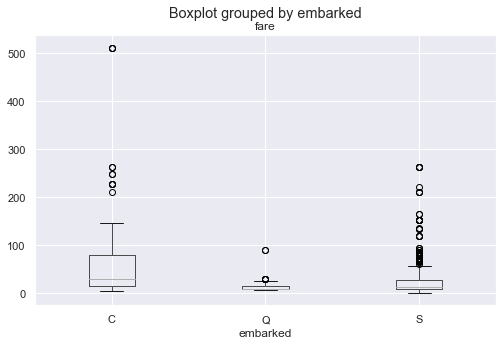

In [46]:
data2.boxplot(column="fare",by = "embarked")
plt.show()

### Looking at Survived % in each categorical variables levels

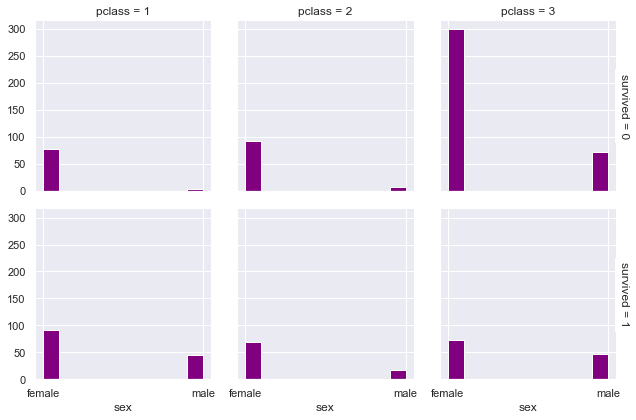

In [47]:
# pclass vs Survived
g = sns.FacetGrid(data2, col="pclass", row="survived", margin_titles=True)
g.map(plt.hist, "sex",color="purple");

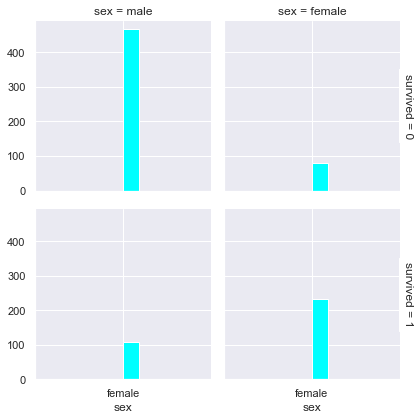

In [48]:
# sex vs Survived
g = sns.FacetGrid(data2, col="sex", row="survived", margin_titles=True)
g.map(plt.hist, "sex",color="cyan");

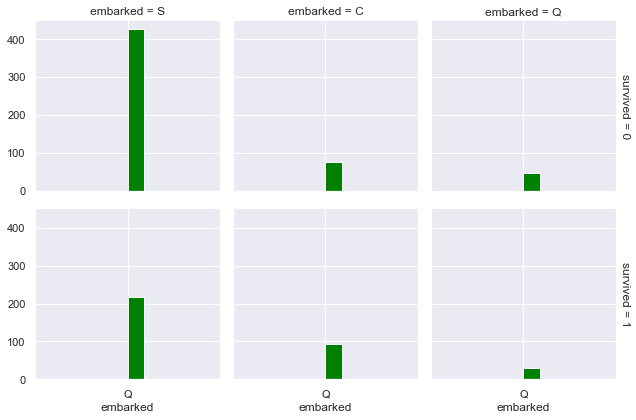

In [49]:
# embarked vs Survived
g = sns.FacetGrid(data2, col="embarked", row="survived", margin_titles=True)
g.map(plt.hist, "embarked",color="green");

In [50]:
# Sibsp vs Survived (better results)
data2[["sibsp","survived"]].groupby(["sibsp"], as_index = False).mean().sort_values(by="survived", ascending = False)

,sibsp,survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


###### <font color=red> <b><u><i>
  <b><i><font color=red>People who came with 1 sibling survived with a greater chance. </font> </b> </i>

In [51]:
# parch vs Survived 
data2[["parch","survived"]].groupby(["parch"], as_index = False).mean().sort_values(by="survived", ascending = False)

,parch,survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [52]:
# sex vs Survived 
data2[["sex","survived"]].groupby(["sex"], as_index = False).mean().sort_values(by="survived", ascending = False)

,sex,survived
0,female,0.742038
1,male,0.188908


###### <font color=red> <b><u><i>
  <b><i><font color=red>The ratio of survival odf females was more as they were given high priority while saving lives according to an article published by the daily mail uk. https://www.dailymail.co.uk/sciencetech/article-1254788/Why-women-children-saved-Titanic-Lusitania.html</font> </b> </i>

In [53]:
# age vs Survived 
data2[["age","survived"]].groupby(["age"], as_index = False).mean().sort_values(by="survived", ascending = False)

,age,survived
0,0.42,1.000000
9,5.00,1.000000
79,63.00,1.000000
68,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
87,80.00,1.000000
2,0.75,1.000000
4,0.92,1.000000


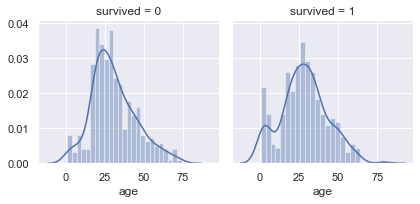

In [54]:
g = sns.FacetGrid(data2, col = "survived")
g.map(sns.distplot, "age", bins = 25)
plt.show()

In [55]:
# embarked vs Survived 

# Survival rate at embarked level
data2[["embarked","survived"]].groupby(["embarked"], as_index = False).mean().sort_values(by="survived", ascending = False)

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


###### <font color=red> <b><u><i>
  <b><i><font color=red>The people who came from Cherbourg survived the most during the tragedy.</font> </b> </i>

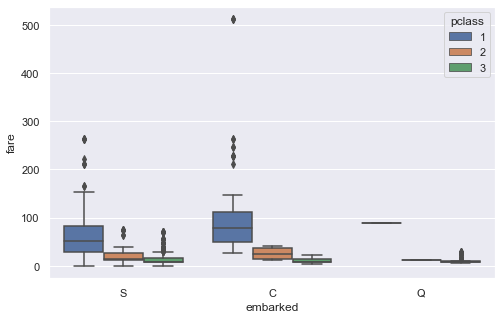

In [56]:
# box plot (fare distribution across each class for each embarked category)
sns.boxplot(x="embarked", y="fare", hue="pclass", data=data2);

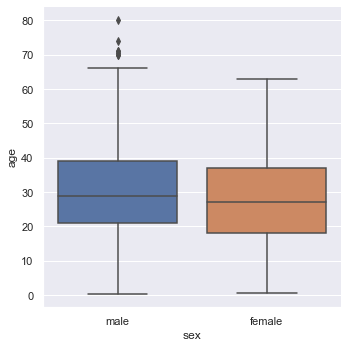

In [57]:
sns.catplot(x = "sex", y = "age", data = data2, kind = "box")
plt.show()

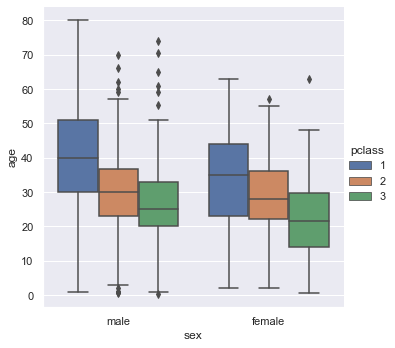

In [58]:
sns.catplot(x = "sex", y = "age", hue = "pclass",data = data2, kind = "box")
plt.show()

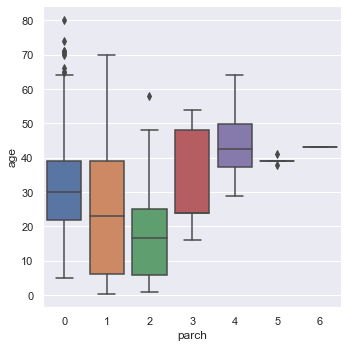

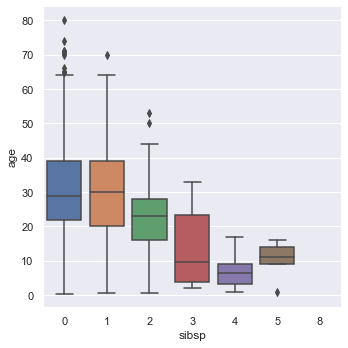

In [59]:
sns.catplot(x = "parch", y = "age", data = data2, kind = "box")
sns.catplot(x = "sibsp", y = "age", data = data2, kind = "box")
plt.show()

###### <font color=red> <b><u><i>
  <b><i><font color=red>Age is not correlated with sex but it is correlated with parch, sibsp and pclass.</font> </b> </i>

## Feature engineering, MVI & Outliers

In [60]:
data2['title'] = data2['name'].str.extract(' ([A-Za-z]+)\.', expand = False)
data2['title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [61]:
data2['title'].value_counts(normalize=True)*100

Mr          58.024691
Miss        20.426487
Mrs         14.029181
Master       4.489338
Dr           0.785634
Rev          0.673401
Major        0.224467
Mlle         0.224467
Col          0.224467
Sir          0.112233
Lady         0.112233
Ms           0.112233
Mme          0.112233
Don          0.112233
Countess     0.112233
Jonkheer     0.112233
Capt         0.112233
Name: title, dtype: float64

In [62]:
# create title variable
data2['title'] = data2['title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data2['title'] = data2['title'].replace('Mlle', 'Miss')
data2['title'] = data2['title'].replace('Ms', 'Miss')
data2['title'] = data2['title'].replace('Mme', 'Mrs')
    
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

data2['title'] = data2['title'].map(title_mapping)

# Imputing missing values with 0
data2['title'] = data2['title'].fillna(0)

In [63]:
# Create Family Size = # of Siblings + # of Parents + You
data2['fam_size'] = data2['sibsp'] + data2['parch'] + 1

In [64]:
# Create family size buckets (if then else)
data2.loc[data2["fam_size"] == 1, "fam_size_bkt"] = 'single'
data2.loc[(data2["fam_size"] > 1)  &  (data2["fam_size"] < 5) , "fam_size_bkt"] = 'small'
data2.loc[data2["fam_size"] >4, "fam_size_bkt"] = 'large'

print(data2["fam_size_bkt"].unique())
print(data2["fam_size_bkt"].value_counts())

['small' 'single' 'large']
single    537
small     292
large      62
Name: fam_size_bkt, dtype: int64


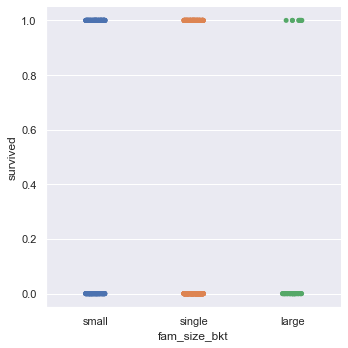

In [65]:
sns.catplot(x="fam_size_bkt", y="survived", data=data2);

### Drop insignificant(redundant) variables & Missing value treatment 

1. From the above analysis it was found out that there were some variables which had no such major relation to the data and hence it was found out that the they could be dropped.
2. The ones which needed some missing values treatement were treated using the outliers treatement method.

In [66]:
# drop ticket variable
data2.drop(['ticket'], axis=1, inplace=True)

In [67]:
# drop name variable as it is already used
data2.drop(['name'], axis=1, inplace=True)

In [68]:
# drop cabin variable as it has too many missing values
data2.drop(['cabin'], axis=1, inplace=True)

In [69]:
# drop missing records of embarked variable
data2.dropna(subset=['embarked'], inplace=True)

In [70]:
### Missing value imputation of Age with median age   
data2['age'].fillna(data2['age'].median(), inplace=True)

In [71]:
data2.isnull().sum()

passengerid     0
survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
title           0
fam_size        0
fam_size_bkt    0
dtype: int64

In [72]:
data2.dtypes

passengerid      object
survived          int64
pclass           object
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
title             int64
fam_size          int64
fam_size_bkt     object
dtype: object

#### Outliers Treatment

In [73]:
def outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [74]:
data2['age']=outlier(data2['age'])  

6.0 22.0 35.0 54.0 <built-in function min> <built-in function max>


In [75]:
data2['age']=outlier(data2['age'])  
data2['sibsp']=outlier(data2['sibsp'])  
data2['parch']=outlier(data2['parch'])  
data2['fare']=outlier(data2['fare'])  

6.0 22.0 35.0 54.0 <built-in function min> <built-in function max>
0.0 0.0 1.0 3.0 <built-in function min> <built-in function max>
0.0 0.0 0.0 2.0 <built-in function min> <built-in function max>
7.225 7.8958 31.0 112.31831999999979 <built-in function min> <built-in function max>


In [76]:
# drop fam size as we have already created bucketed variable (fam_Size_bkt)
del data2['fam_size']

In [77]:
data2.columns

Index(['passengerid', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'title', 'fam_size_bkt'], dtype='object')

In [78]:
# Seperation of columns into numeric and categorical columns
types = np.array([dt for dt in data2.dtypes])

all_columns = data2.columns.values

is_num = types != 'object'
num_cols = all_columns[is_num]
cat_cols = all_columns[~is_num]

data2_num = (data2[num_cols]) 
data2_cat = (data2[cat_cols]) 

In [79]:
data2_num.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'title'], dtype='object')

In [80]:
data2_cat.columns

Index(['passengerid', 'pclass', 'sex', 'embarked', 'fam_size_bkt'], dtype='object')

In [81]:
data2_num.isnull().sum()

survived    0
age         0
sibsp       0
parch       0
fare        0
title       0
dtype: int64

In [82]:
data2_cat.isnull().sum()

passengerid     0
pclass          0
sex             0
embarked        0
fam_size_bkt    0
dtype: int64

In [83]:
# Create Dummy variables  
'''Dummy Variables for columns. When drop_first is set as True, it gives k-1 dummies out of k categorical levels by removing the first level.'''

data2_dummies = pd.get_dummies(data2, columns = ['pclass','sex','embarked','fam_size_bkt'], drop_first = True)

#Concat new columns to original dataframe 
data3 = pd.concat([data2, data2_dummies], axis=1)
data3 = data3.loc[:,~data3.columns.duplicated()] # remove duplicate columns
print(data3.shape)
data3.head()  

(889, 18)


,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,title,fam_size_bkt,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,fam_size_bkt_single,fam_size_bkt_small
0,1,0,3,male,22.0,1.0,0.0,7.25000,S,1,small,0,1,1,0,1,0,1
1,2,1,1,female,38.0,1.0,0.0,112.31832,C,3,small,0,0,0,0,0,0,1
2,3,1,3,female,26.0,0.0,0.0,7.92500,S,2,single,0,1,0,0,1,1,0
3,4,1,1,female,35.0,1.0,0.0,53.10000,S,3,small,0,0,0,0,1,0,1
4,5,0,3,male,35.0,0.0,0.0,8.05000,S,1,single,0,1,1,0,1,1,0


In [84]:
data2_dummies.head()

,passengerid,survived,age,sibsp,parch,fare,title,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,fam_size_bkt_single,fam_size_bkt_small
0,1,0,22.0,1.0,0.0,7.25000,1,0,1,1,0,1,0,1
1,2,1,38.0,1.0,0.0,112.31832,3,0,0,0,0,0,0,1
2,3,1,26.0,0.0,0.0,7.92500,2,0,1,0,0,1,1,0
3,4,1,35.0,1.0,0.0,53.10000,3,0,0,0,0,1,0,1
4,5,0,35.0,0.0,0.0,8.05000,1,0,1,1,0,1,1,0


In [85]:
data3.columns

Index(['passengerid', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'title', 'fam_size_bkt', 'pclass_2', 'pclass_3', 'sex_male', 'embarked_Q', 'embarked_S', 'fam_size_bkt_single', 'fam_size_bkt_small'], dtype='object')

In [86]:
data3.shape

(889, 18)

In [87]:
data3.head(3)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked,title,fam_size_bkt,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,fam_size_bkt_single,fam_size_bkt_small
0,1,0,3,male,22.0,1.0,0.0,7.25000,S,1,small,0,1,1,0,1,0,1
1,2,1,1,female,38.0,1.0,0.0,112.31832,C,3,small,0,0,0,0,0,0,1
2,3,1,3,female,26.0,0.0,0.0,7.92500,S,2,single,0,1,0,0,1,1,0


## Feature selection techniques

In [88]:
# RFE  

X_data=data3.loc[:,['pclass_2', 'pclass_3', 'sex_male', 'embarked_Q', 'embarked_S', 'fam_size_bkt_single', 'fam_size_bkt_small']]
y_data=data3.loc[:,'survived']

num_feats=5  # no of maximum features we need to select    

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
  
rfe_selector.fit(X_data,y_data)
rfe_support = rfe_selector.get_support()

Fitting estimator with 7 features.


In [89]:
rfe_feature = X_data.loc[:,rfe_support].columns.tolist()

print(str(len(rfe_feature)), 'selected features')

rfe_support = rfe_selector.get_support()
rfe_feature = X_data.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

5 selected features
5 selected features


['pclass_2',
 'pclass_3',
 'sex_male',
 'fam_size_bkt_single',
 'fam_size_bkt_small']

###### <font color=red> <b><u><i>
  <b><i><font color=red>Top variables are PCLASS, SEX, FAM SIZE .</font> </b> </i>

[0.03275186 0.18635151 0.60027209 0.01341327 0.03675006 0.04513043
 0.08533078]


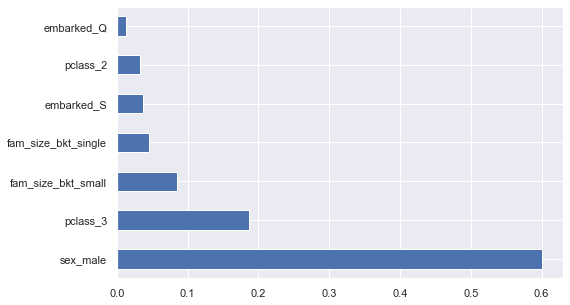

In [90]:
# Feature Importance is an inbuilt class that comes with Tree Based 
# Classifiers, we will be using Extra Tree Classifier
# for extracting the top 10 features for the dataset.
  
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_data,y_data)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Fit Logistic Regression Model

### Logistic model from statsmodels library

In [91]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data3, test_size=0.25)  

In [92]:
print(train.shape)
print(test.shape)

(666, 18)
(223, 18)


In [93]:
## Build Model
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [94]:
model1=smf.glm("survived~age+sibsp+parch+fare+pclass_2+pclass_3+sex_male+embarked_Q+embarked_S+fam_size_bkt_single+ fam_size_bkt_small",data=train,
              family=sm.families.Binomial()).fit()


g:\aws\envs\sallu\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


In [95]:
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  666
Model:                            GLM   Df Residuals:                      666
Model Family:                Binomial   Df Model:                           -1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -281.64
Date:                Mon, 22 Jun 2020   Deviance:                       563.28
Time:                        02:43:58   Pearson chi2:                     668.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2933    

<b>Removing the variables based upon their P Values with gretater than 0.05

In [96]:
### Remove variables with high P values
cols = ['sibsp','parch','fare','embarked_Q','embarked_S']
train1 = train.drop(cols, axis=1)
train1.shape

(666, 13)

In [97]:
model2=smf.glm("survived~age+pclass_2+pclass_3+sex_male+fam_size_bkt_single+fam_size_bkt_small",data=train1,
              family=sm.families.Binomial()).fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  666
Model:                            GLM   Df Residuals:                      659
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -284.61
Date:                Mon, 22 Jun 2020   Deviance:                       569.21
Time:                        02:43:58   Pearson chi2:                     654.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.8730    

###### <font color=red> <b><u><i>
  <b><i><font color=red>The z value of intercept in the final model after removing the variables is 2.92 .</font> </b> </i>

In [98]:
print(model2.summary2())

                 Results: Generalized linear model
Model:                 GLM               AIC:             583.2116  
Link Function:         logit             BIC:             -3715.1383
Dependent Variable:    survived          Log-Likelihood:  -284.61   
Date:                  2020-06-22 02:43  LL-Null:         -440.73   
No. Observations:      666               Deviance:        569.21    
Df Model:              6                 Pearson chi2:    654.      
Df Residuals:          659               Scale:           1.0000    
Method:                IRLS                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            1.8730   0.6397   2.9279 0.0034  0.6192  3.1267
age                 -0.0482   0.0103  -4.6752 0.0000 -0.0684 -0.0280
pclass_2            -1.3047   0.3060  -4.2645 0.0000

###### <font color=red> <b><u><i>
  <b><i><font color=red>The AIC value is 583.21 & it shows 569.21 deviance.</font> </b> </i>

#### Some useful insights from the model are calculated below

In [99]:
# Beta coefficients
model2.params

Intercept              1.872959
age                   -0.048210
pclass_2              -1.304728
pclass_3              -2.340909
sex_male              -2.827676
fam_size_bkt_single    2.301883
fam_size_bkt_small     2.435061
dtype: float64

In [100]:
# Odds ratio
np.exp(model2.params)

Intercept               6.507523
age                     0.952934
pclass_2                0.271246
pclass_3                0.096240
sex_male                0.059150
fam_size_bkt_single     9.992980
fam_size_bkt_small     11.416510
dtype: float64

In [101]:
# AIC, BIC 
print(model2.aic)
print(model2.bic)

583.211605289649
-3715.1382875964673


In [102]:
# Deviance
model2.deviance

569.211605289649

In [103]:
train1.columns

Index(['passengerid', 'survived', 'pclass', 'sex', 'age', 'embarked', 'title', 'fam_size_bkt', 'pclass_2', 'pclass_3', 'sex_male', 'fam_size_bkt_single', 'fam_size_bkt_small'], dtype='object')

In [104]:
test.columns

Index(['passengerid', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'title', 'fam_size_bkt', 'pclass_2', 'pclass_3', 'sex_male', 'embarked_Q', 'embarked_S', 'fam_size_bkt_single', 'fam_size_bkt_small'], dtype='object')

In [105]:
# Predict on test 

# Keep only the variables from the final model in test dataset (IMP. NOTE)
test = sm.add_constant(test[['survived','age','pclass_2','pclass_3','sex_male','fam_size_bkt_single','fam_size_bkt_small']])
predictions  = model2.predict(test)
predictions.head()

368    0.618704
412    0.938027
732    0.212915
173    0.118558
549    0.447676
dtype: float64

In [106]:
y_pred = predictions.map(lambda x: 1 if x > 0.5 else 0)

In [107]:
y_pred.head()

368    1
412    1
732    0
173    0
549    0
dtype: int64

In [108]:
accuracy = sum(y_pred == test['survived']) / len(test)
print("Accuracy_Rate= ",accuracy)

Accuracy_Rate=  0.820627802690583


### The accuracy for the model according to statsmodel is 82.06%

## Logistic model from Sktlearn library

In [109]:
### Split dataset into train and test datasets (random sampling)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data3.drop('survived', axis=1), data3['survived'],\
                                                    test_size=0.25, random_state=156)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as model_selection

In [111]:
from patsy import dmatrices

In [112]:
X_data=data3.loc[:,['pclass_2', 'pclass_3', 'sex_male', 'embarked_Q', 'embarked_S', 'fam_size_bkt_single', 'fam_size_bkt_small']]
y_data=data3.loc[:,'survived']

In [113]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_data,y_data,test_size=0.25,random_state=200)

In [114]:
logit = LogisticRegression()

In [115]:
logit.fit(X_train, y_train)
logit

LogisticRegression()

In [116]:
logit.classes_

array([0, 1], dtype=int64)

In [117]:
#Get the coefficient values for all of the predictors
logit.coef_

array([[-0.41116518, -1.59868185, -2.49329209, -0.0657497 , -0.36589839,
         1.16086353,  1.52219536]])

In [118]:
#Make predictions on the test set
logit.predict(X_test)

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [119]:
#Calculate the accuracy score
logit.score(X_test, y_test)

0.8161434977578476

In [120]:
logit.intercept_

array([0.98034088])

In [121]:
logit.coef_

array([[-0.41116518, -1.59868185, -2.49329209, -0.0657497 , -0.36589839,
         1.16086353,  1.52219536]])

In [122]:
logit.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### The accuracy for the model according to sktlearn library is 81.61% which is a bit lower than that from the statsmodel library whose accuracy was 82.06%.

## Model Performance KPIs

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
#Make class predictions
predictions = logit.predict(X_test)

In [125]:
# Accuracy rate
logit.score(X_test, y_test)

0.8161434977578476

In [126]:
#Calculate Error rate
1-logit.score(X_test, y_test)

0.18385650224215244

In [127]:
accuracy_score(y_test, predictions)

0.8161434977578476

In [128]:
#Calculate number of correctly classified observations
accuracy_score(y_test, predictions, normalize=False)

182

In [129]:
#Calculate number of incorrectly classified observations
len(y_test) - accuracy_score(y_test, predictions, normalize=False)

41

In [130]:
#Calculate log loss
from sklearn.metrics import log_loss
import numpy as np

In [131]:
y_pred = np.where(predictions > 0.5,1,0)

In [132]:
log_loss(y_test, y_pred)

6.350228818633905

In [133]:
y_pred[:5]

array([0, 1, 0, 0, 0])

In [134]:
y_test[:1]

45    0
Name: survived, dtype: int64

## ROC Curve and it's Cutoff Probability

In [135]:
#Calculate Area under the ROC curve and also plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

In [136]:
probs = logit.predict_proba(X_test)[::,1]

In [137]:
# AUC
auc = roc_auc_score(y_test, probs)
print(auc)

0.8553767009624959


In [138]:
fpr, tpr, threshold = roc_curve(y_test, probs)

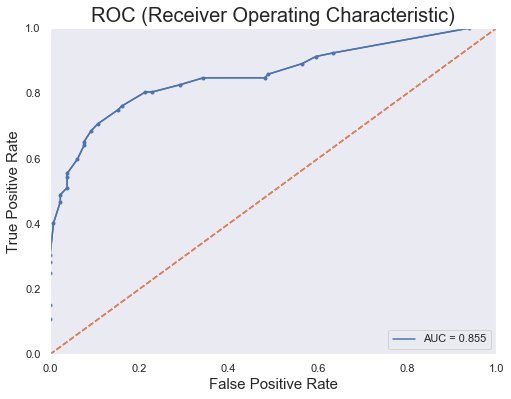

In [139]:
# ROC Curve 

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

plt.figure(figsize=(8,6))
plt.title('ROC (Receiver Operating Characteristic)',fontsize = 20)
plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.grid()
plt.show()

In [140]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

In [141]:
# find optimal cutoff probability for dependent variable   
optimal_threshold

0.4008508821450382

In [142]:
#Update model based on optimal probability threshold
new_predictions = np.where(probs>optimal_threshold, 1, 0)

In [145]:
new_confusion_mat = confusion_matrix(y_test, new_predictions)

In [146]:
new_confusion_df = pd.DataFrame(new_confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [147]:
new_confusion_df

,Predicted neg,Predicted pos
Actual neg,111,20
Actual pos,23,69


In [148]:
#Calculate the updated accuracy score and log loss metrics
accuracy_score(y_test, new_predictions)

0.8071748878923767

In [149]:
log_loss(y_test, new_predictions)

6.660015143182795

In [150]:
# Classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, new_predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       131
           1       0.78      0.75      0.76        92

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



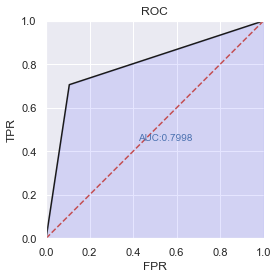

{'AUC': 0.7998, 'Gini': 0.5997, 'pic': <Figure size 432x288 with 1 Axes>}

In [153]:
# ROC Chart
sc.perf_eva(y_test, y_pred, plot_type = ["roc"])

<Figure size 1600x1200 with 0 Axes>

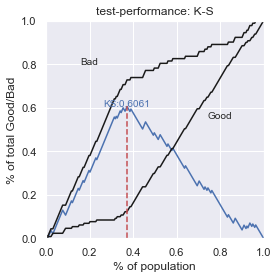

In [154]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')

import scorecardpy as sc
# KS Chart
test_perf = sc.perf_eva(y_test, y_pred, title = "test-performance",plot_type=['ks'])

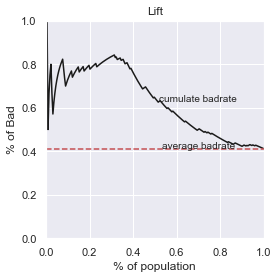

{'pic': <Figure size 432x288 with 1 Axes>}

In [155]:
# Lift Chart
sc.perf_eva(y_test, y_pred, plot_type = ["lift"])

In [156]:
new_predictions1=pd.DataFrame(new_predictions,columns=['survival_pred'])
new_predictions1.head()

,survival_pred
0,0
1,1
2,0
3,0
4,0


In [157]:
y_test2 = pd.concat([y_test, new_predictions1], axis=1)

In [158]:
y_test2.shape

(396, 2)

In [159]:
y_test2.isnull().sum()

survived         173
survival_pred    173
dtype: int64

In [160]:
y_test2['survived'] = y_test2['survived'].fillna(0)
y_test2['survival_pred'] = y_test2['survival_pred'].fillna(0)

In [161]:
y_test2.isnull().sum()

survived         0
survival_pred    0
dtype: int64

In [162]:
y_test2.head()

,survived,survival_pred
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


## Confusion Matrix

In [163]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [164]:
confusion_mat = confusion_matrix(y_test, y_pred)

In [165]:
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [166]:
confusion_df

,Predicted neg,Predicted pos
Actual neg,117,14
Actual pos,27,65


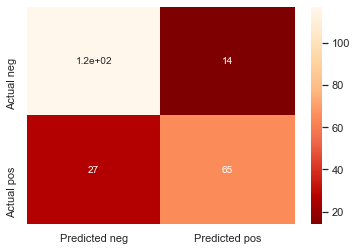

In [167]:
cf=sns.heatmap(confusion_df, cmap='OrRd_r', annot=True)
cf

In [168]:
CM = confusion_matrix(y_test,y_pred)

print("  actual")
print(CM)

print("----------")
print("   TN FP")
print("   FN TP")
print("----------")

  actual
[[117  14]
 [ 27  65]]
----------
   TN FP
   FN TP
----------


In [169]:
#Calculate precision and recall scores
from sklearn.metrics import precision_score, recall_score

In [170]:
# Precision 
precision_score(y_test, y_pred)

0.8227848101265823

In [171]:
# Recall 
recall_score(y_test, y_pred)

0.7065217391304348

In [172]:
#Calculate F1 Score
from sklearn.metrics import f1_score

In [173]:
f1_score(y_test, y_pred)

0.7602339181286549

###### <font color=red> <b><u><i> Note
  <b><i><font color=red>CM = confusion_matrix(y_test, y_pred)

- TN = CM[0][0]
- FN = CM[1][0]
- TP = CM[1][1]
- FP = CM[0][1]</font> </b> </i>

In [175]:
TN = 117
TP = 65
FN = 27
FP = 14

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

print("The probability of predicting good customers correctly is ",round(specificity,4))
print("The probability of predicting bad  customers correctly is ",round(sensitivity,4))

The probability of predicting good customers correctly is  0.8931
The probability of predicting bad  customers correctly is  0.7065


#### Meaning of True/False Positives and True/False Negatives

 - True positive means, model has predicted output as 1 (event happening or conduicive) and its matching  with the original data, hence prediction is TRUE or correct 

 - False positive means, model had predicyed output as 1 (event happening or situtation conduicive) but in the original data its contradicting, hence the prediction is incorrect. Thus FALSE. 

 - True Negative means, model has produced an output as 0,(event not happeining or not conduicice) and this is matching with the original data. Hence negative prediction is made correctly, so prediction is TRUE about the negative outcome. 

In [176]:
# Accuracy of the confusion matrix 
total=sum(sum(CM))

accuracy=(CM[0,0]+CM[1,1])/total
print ('Accuracy of the confusion matrix is ', str(round(accuracy*100,2))+'%')

Accuracy of the confusion matrix is  81.61%


### Hence the confusion matrix is made according to the final predictions created in ROC Curves with an accuracy of Confusion matrix being 81.61%.